### Student Information
Name: 柯詠詠

Student ID: 112065502

GitHub ID: 86145342

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

# Take home exercise

In [ ]:
### Begin Assignment Hereimport sklearn as skl
import pandas as pd
import numpy as np
import matplotlib as mlt
import plotly as plt
import seaborn as sb
import nltk

In [ ]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [ ]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [ ]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [ ]:
import pandas as pd

# my functions
import data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])


In [ ]:
# add category to the dataframe
X['category'] = twenty_train.target

In [ ]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [ ]:
#Answer here
X.groupby('category_name').count().rename(columns={'text':'count'})["count"]



category_name
alt.atheism               480
comp.graphics             584
sci.med                   594
soc.religion.christian    599
Name: count, dtype: int64

---

### >>> **Exercise 5 (take home)**
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [ ]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## Answer here
C、D、F的missing_exmaple 資料都屬於字串，C 會被認為是NaN這個字、D會被認為是None這個字、F雖然沒有存入任何字元，但仍然是字串。因此雖然在資料集中None、NaN都是代表missing data，但依然要符合格式才能被程式認定為資料遺失。

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here

#1.X的編號是由0開始依序遞增，X_sample則是亂數。
#2.抽樣前X有2257列，X_sample則只有1000列(sample的原因)
#3.原始X有2259列但到抽樣前X只剩2257，因為去掉重複或不見的DATA

---

### >>> **Exercise 8 (take home):**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![alt txt](https://i.imgur.com/9eO431H.png)

In [ ]:
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


<Axes: >

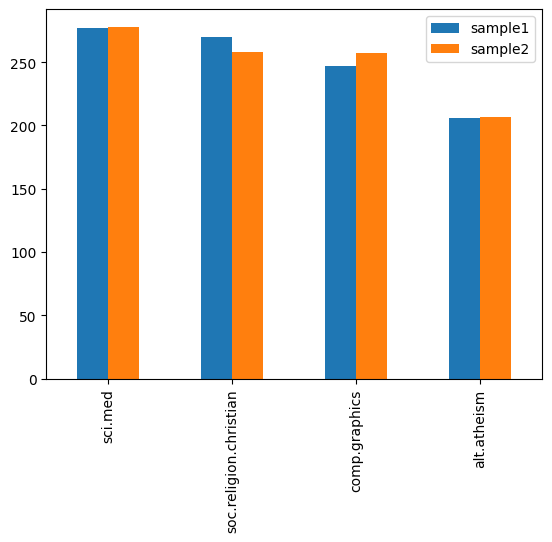

In [ ]:
# Answer here
X1_sample = X.sample(n=1000,random_state=41) #random state


category_counts1 = X_sample['category_name'].value_counts().values
category_counts2 = X1_sample['category_name'].value_counts().values

category = X_sample['category_name'].value_counts().index

df = pd.DataFrame({'sample1': category_counts1,
                   'sample2': category_counts2,}, index=category)



plot = df.plot.bar()#長條圖
plot






---

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
'''
LookupError:
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
vocabulary = count_vect.get_feature_names_out()[X_counts[4].indices[1]]
print(vocabulary)

subject


---

### **>>> Exercise 11 (take home):**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

## answer

我想到的方法有把詞頻過低的去掉、矩陣分更小塊再印出等等。下面程式碼試著想要把總辭頻過少的刪掉，但不知道是哪邊寫錯，出來的結果跟我自己設想的不一樣。

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
Y_counts = X_counts
#計算每個詞的總詞頻
word_counts = Y_counts.sum(axis=0)
print(word_counts.shape[1])
print(word_counts.shape)
#把出現過少的詞刪掉
count = Y_counts.toarray()
for  i in range(word_counts.shape[1]):
  if word_counts[0, i]<=2:
    Y_counts = Y_counts[[r for r in range(Y_counts.shape[0]) if r != i]]




plot_z = Y_counts[0:20, 0:20].toarray() #Y_counts[documents,terms]
print(plot_z)



35788
(1, 35788)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

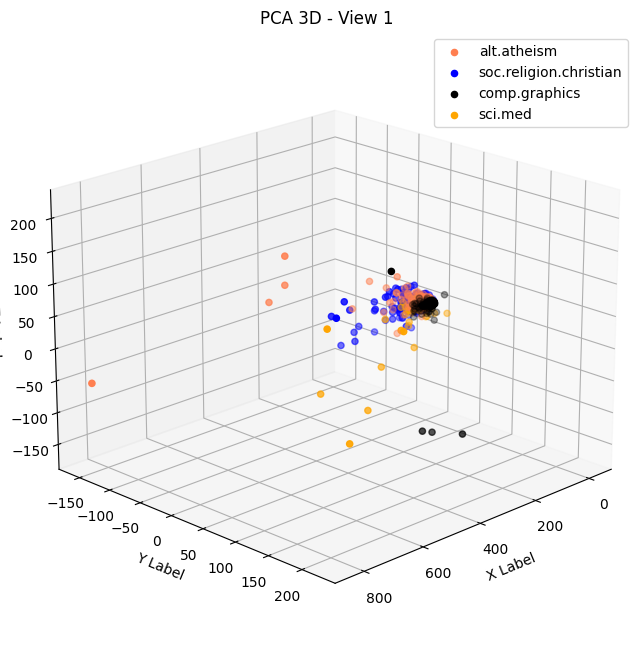

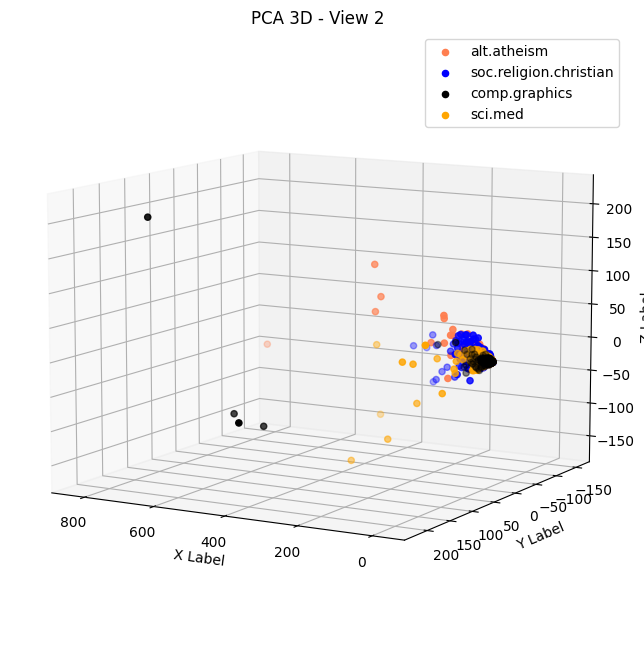

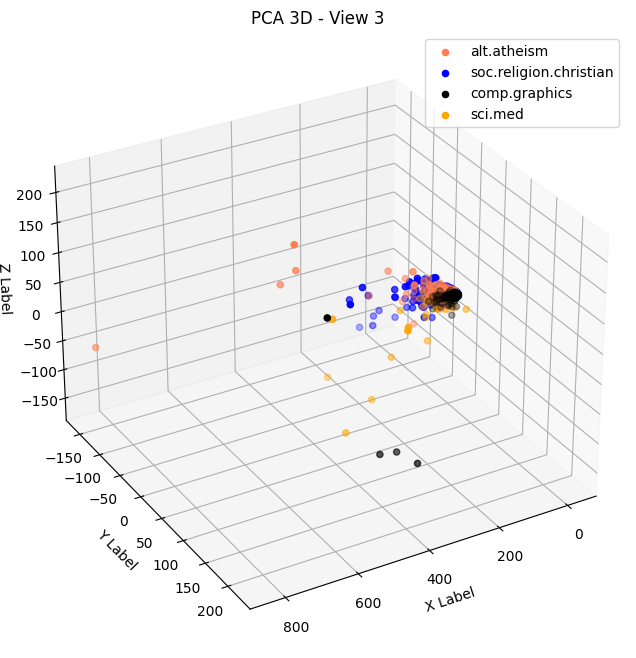

In [ ]:
# Answer here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 匯入3D繪圖工具
from sklearn.decomposition import PCA

# PCA降維到3
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']


# 創建3D圖
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 視角1
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='best')

ax.view_init(elev=20, azim=45)  # 設定視角1
plt.title('PCA 3D - View 1')
plt.show()



# 視角2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='best')

ax.view_init(elev=10, azim=120)  # 設定視角2
plt.title('PCA 3D - View 2')
plt.show()



# 視角3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='best')
ax.view_init(elev=30, azim=60)  # 設定視角3
plt.title('PCA 3D - View 3')
plt.show()


---

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
!pip install plotly

In [ ]:
# Answer here

import plotly.express as pe

term_frequencies_df = pd.DataFrame({'Frequency': term_frequencies[:300],
                  'Term': count_vect.get_feature_names_out()[:300]})

# 使用Plotly創長條圖
fig = pe.bar(term_frequencies_df, x='Term', y='Frequency', title='Top 300 Terms Term Frequencies')
fig.update_xaxes(title_text='Term')
fig.update_yaxes(title_text='Frequency')
fig.show()


---

### >>> **Exercise 14 (take home):**
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


In [ ]:
# Answer here
#刪去詞頻<=5的詞


term_frequencies_df = pd.DataFrame({'Frequency': term_frequencies[:300][term_frequencies[:300] > 5],
                                    'Term': count_vect.get_feature_names_out()[:300][term_frequencies[:300] > 5]})

# Plotly Express
fig = pe.bar(term_frequencies_df, x='Term', y='Frequency', title='frequency above 0 for the top 300 terms')
fig.update_xaxes(title_text='term')  # x軸標題
fig.update_yaxes(title_text='frequency')  # y軸標題
fig.show()



---

### >>> **Exercise 15 (take home):**
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
import plotly.express as px

# 從前300個詞挑出詞頻>5的
term_frequencies_df = pd.DataFrame({'Frequency': term_frequencies[:300][term_frequencies[:300] > 5],
                                    'Term': count_vect.get_feature_names_out()[:300][term_frequencies[:300] > 5]})



term_frequencies_df = term_frequencies_df.sort_values(by='Frequency', ascending=False)

# 使用Plotly
fig = px.bar(term_frequencies_df, x='Term', y='Frequency', title='前300个词中词频超过40的词汇')
fig.update_xaxes(categoryorder='total descending')  # 降冪排列
fig.update_xaxes(title_text='詞彙')
fig.update_yaxes(title_text='詞頻')
fig.show()

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.category)

LabelBinarizer()

In [ ]:
X['bin_category'] = mlb.transform(X['category']).tolist()

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

No, it doesn't work.但我不確定為什麼，是因為tolist只能抓int嗎?所以string不能使用?

In [ ]:
# Answer here
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 0, 0]"


---

# Data Mining Homework1


---

In [ ]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib as mlt
import plotly as plt
import seaborn as sb
import nltk

---

In [ ]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

##  The Data


![pic1.png](attachment:pic1.png)

---

## Data Preparation
**已經用電腦先把3個new data合併再一個csv檔裡面**

In [ ]:
data = 'data.csv'
df = pd.read_csv(data, encoding='ISO-8859-1')

print(df.head())

                                            sentence  label
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [ ]:
len(df)

2747

Let's take at look of the attributions.

In [ ]:
column_names = df.columns
print(column_names)



Index(['sentence', 'label'], dtype='object')


---
嘗試列印前面兩行

In [ ]:
df[0:2]

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [ ]:
for t in df["sentence"][:3]:
    print(t)

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.


---

In [ ]:
df.groupby('label').count().rename(columns={'sentence':'count'})["count"]


label
0    1362
1    1385
Name: count, dtype: int64

###  Missing Values

In [ ]:
# check missing values
df.isnull()

,sentence,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2742,False,False
2743,False,False
2744,False,False
2745,False,False


In [ ]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2742    (The amoung of missing records is: , 0)
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
Length: 2747, dtype: object

---

In [ ]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,label
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [ ]:
len(df)

2747

###  Dealing with Duplicate Data


In [ ]:
X1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2742    False
2743    False
2744    False
2745    False
2746    False
Length: 2747, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [ ]:
sum(df.duplicated())

19

In [ ]:
sum(df.duplicated('sentence'))

20

In [ ]:
len(df)

2749

In [ ]:
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [ ]:
len(df)

2709

---

##  Data Preprocessing


###  Sampling


In [ ]:
print(df.shape)
df_sample = df.sample(n=1000,random_state=40) #random state
display(df_sample)

(2709, 2)


,sentence,label
1343,"While you don't yet hear Mickey speak, there a...",1
1420,Don't miss it.,1
1567,And it was boring.,0
401,I don't have to be an accountant to know I'm g...,0
797,Mediocre food.,0
...,...,...
2087,Excellent sound quality.,1
1576,You won't forget this movie!,1
2251,I wear glasses and it fits fine with them.,1
2276,Razr Battery - Good buy.,1


In [ ]:
len(df_sample)

1000

In [ ]:
df_sample[0:4]

,sentence,label
1343,"While you don't yet hear Mickey speak, there a...",1
1420,Don't miss it.,1
1567,And it was boring.,0
401,I don't have to be an accountant to know I'm g...,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

1    1363
0    1346
Name: label, dtype: int64


<Axes: title={'center': 'label distribution'}>

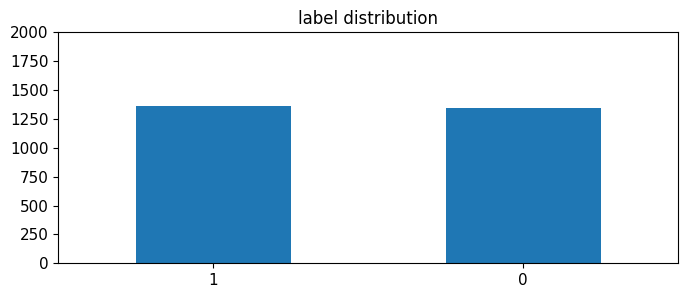

In [ ]:
print(df.label.value_counts())

# plot barchart for X
df.label.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, 2000],
                                    rot = 0, fontsize = 11, figsize = (8,3))

### sample的結果畫成長條圖

1    501
0    499
Name: label, dtype: int64


<Axes: title={'center': 'lable distribution'}>

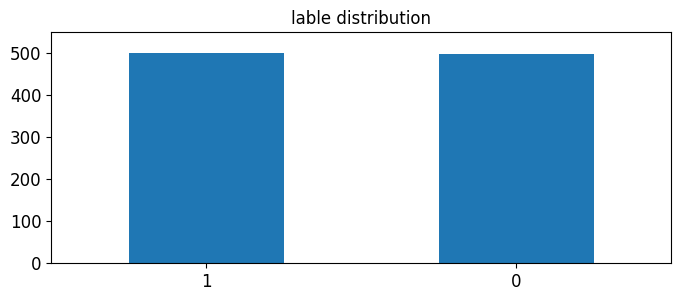

In [ ]:
print(df_sample.label.value_counts())

# plot barchart for X_sample
df_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'lable distribution',
                                           ylim = [0, 550],
                                           rot = 0, fontsize = 12, figsize = (8,3))

兩次sample結果皆畫成長條圖，發現差異沒有很大，且與原先的total差異也不大

<Axes: >

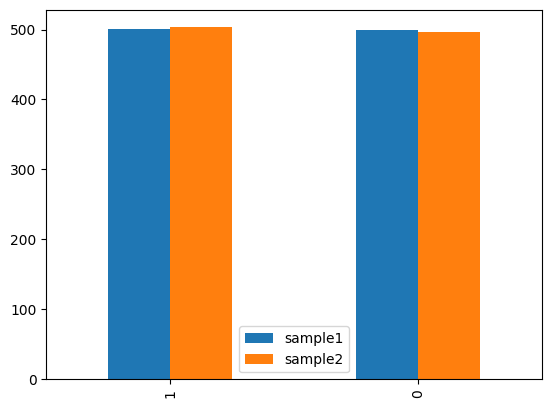

In [ ]:

df1_sample = df.sample(n=1000,random_state=41) #random state


label_counts1 = df_sample['label'].value_counts().values
label_counts2 = df1_sample['label'].value_counts().values

category = df_sample['label'].value_counts().index

df = pd.DataFrame({'sample1': label_counts1,
                   'sample2': label_counts2,}, index=category)



plot = df.plot.bar()#長條圖
plot


### Feature Creation


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
df[0:4]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [ ]:
df[0:4]

,sentence,label,unigrams
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."


In [ ]:
list(df[0:1]['unigrams'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data.

---

### Feature subset selection


![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
print(df_counts.shape)
print(df_counts[0])

(2747, 5152)
  (0, 5108)	1
  (0, 2708)	1
  (0, 4554)	1
  (0, 3349)	1


In [ ]:
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

['wow', 'loved', 'this', 'place']

---

Now let us look at the term-document matrix we built above.

In [ ]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [ ]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [ ]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [ ]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [ ]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [ ]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


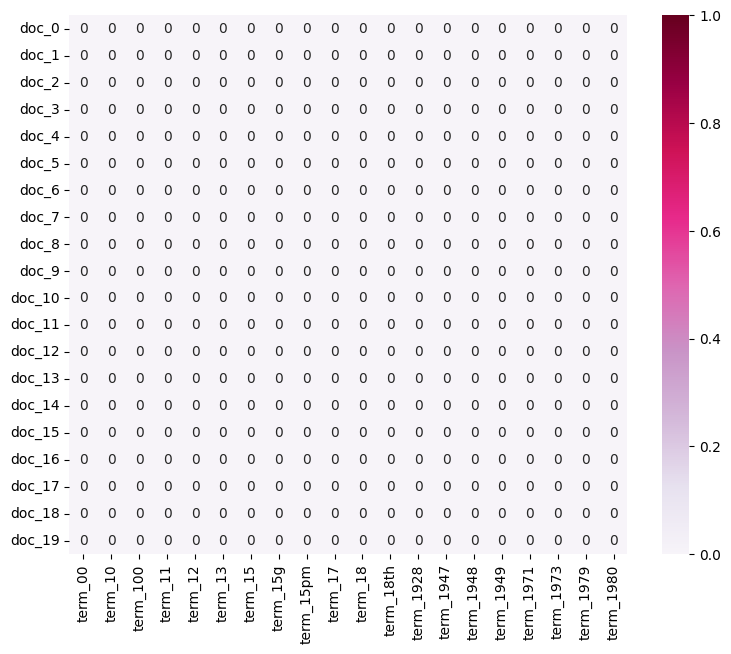

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

##  Dimensionality Reduction


In [ ]:
df_counts.shape

(2747, 5152)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2747, 5152)
(2747, 2)


In [ ]:
df_reduced.shape

(2747, 2)

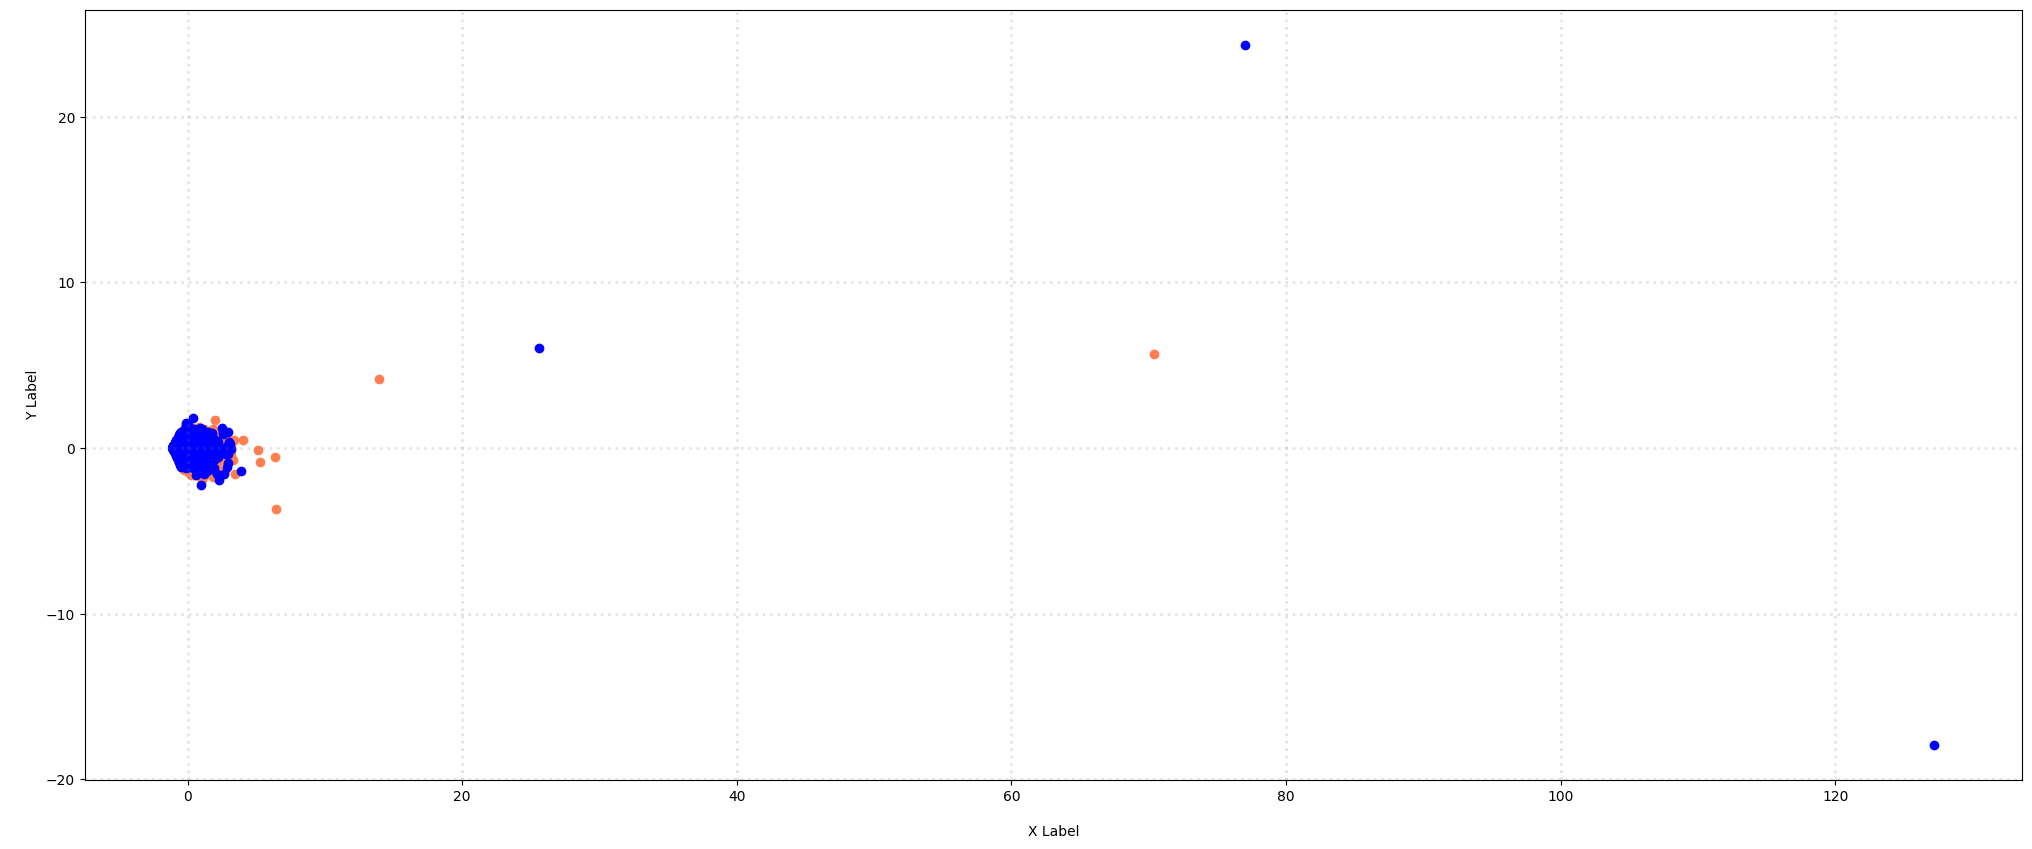

In [ ]:
col = ['coral', 'blue']
categories=[1,0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['label'] == category].T[0]
    ys = df_reduced[df['label'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 3D visualization

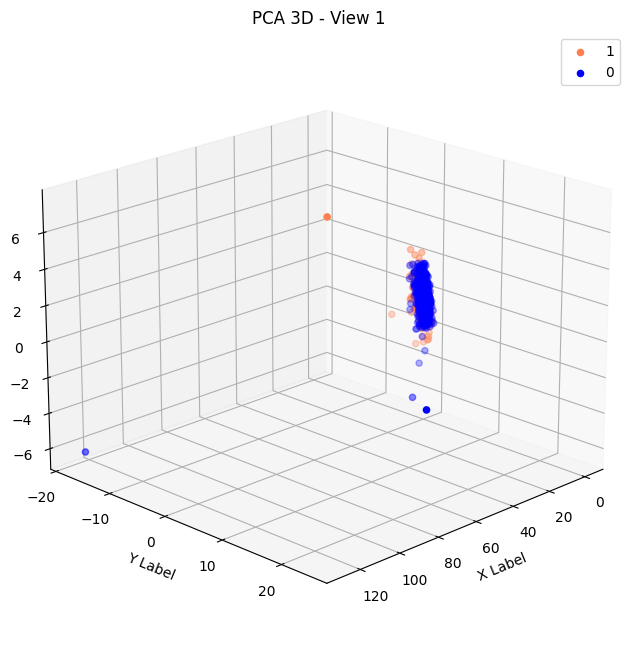

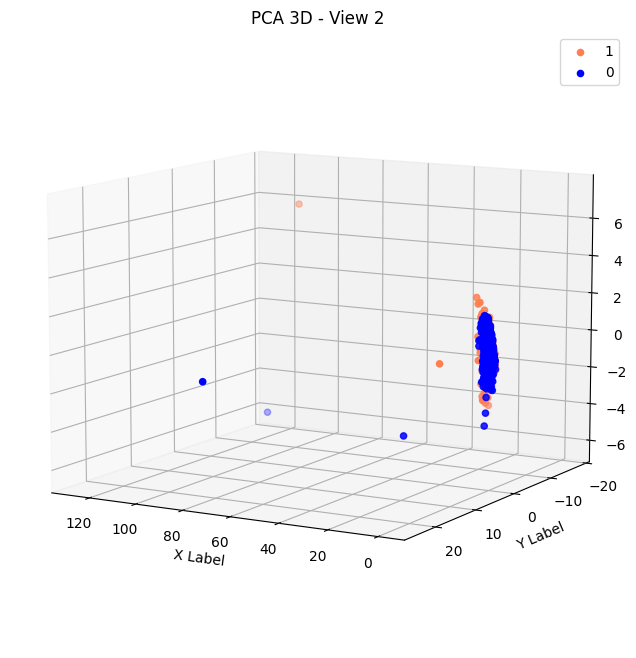

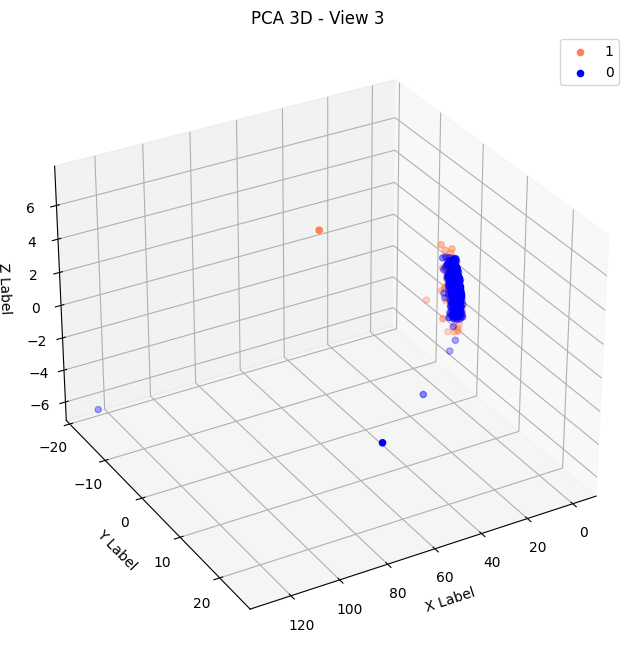

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 匯入3D繪圖工具
from sklearn.decomposition import PCA

# PCA降維到3
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue']


# 創建3D圖
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 視角1
for c, category in zip(col, categories):
    xs = df_reduced[df['label'] == category].T[0]
    ys = df_reduced[df['label'] == category].T[1]
    zs = df_reduced[df['label'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='best')

ax.view_init(elev=20, azim=45)  # 設定視角1
plt.title('PCA 3D - View 1')
plt.show()



# 視角2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced[df['label'] == category].T[0]
    ys = df_reduced[df['label'] == category].T[1]
    zs = df_reduced[df['label'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='best')

ax.view_init(elev=10, azim=120)  # 設定視角2
plt.title('PCA 3D - View 2')
plt.show()



# 視角3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced[df['label'] == category].T[0]
    ys = df_reduced[df['label'] == category].T[1]
    zs = df_reduced[df['label'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='best')
ax.view_init(elev=30, azim=60)  # 設定視角3
plt.title('PCA 3D - View 3')
plt.show()


---

### Attribute Transformation / Aggregation


![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(df_counts.shape[1])
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

5152


In [ ]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [ ]:
term_frequencies[0] #sum of first term: 00

1

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


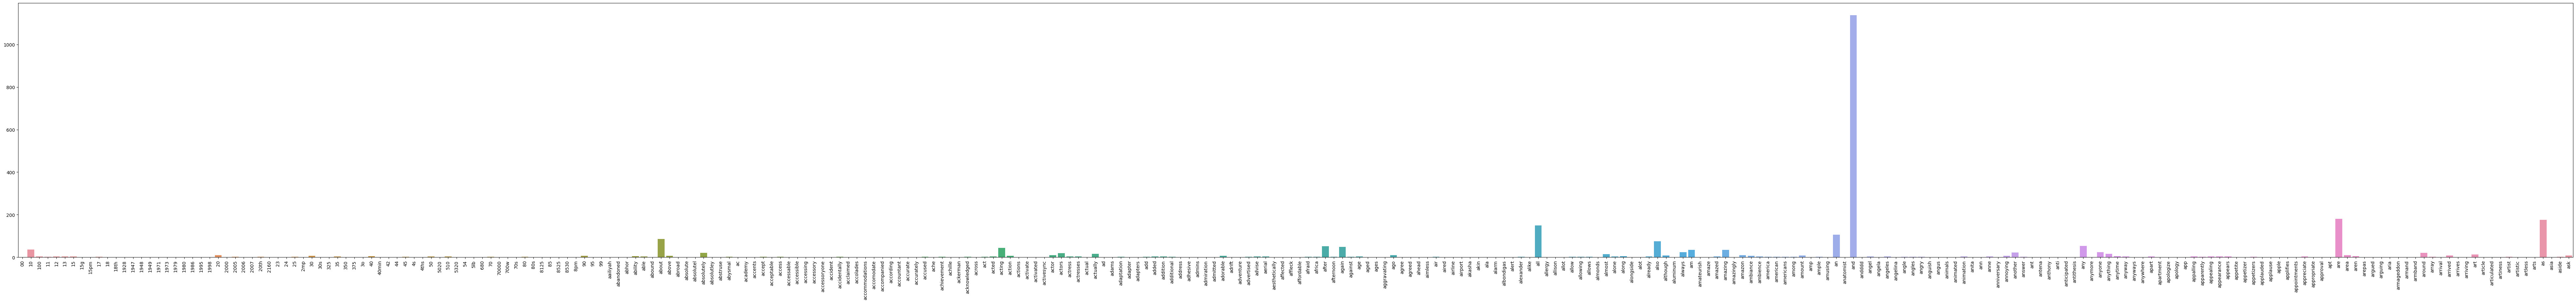

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

---

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as pe

term_frequencies_df = pd.DataFrame({'Frequency': term_frequencies[:300],
                  'Term': count_vect.get_feature_names_out()[:300]})

# 使用Plotly創長條圖
fig = pe.bar(term_frequencies_df, x='Term', y='Frequency', title='Top 300 Terms Term Frequencies')
fig.update_xaxes(title_text='Term')
fig.update_yaxes(title_text='Frequency')
fig.show()


---

In [ ]:
term_frequencies_df = pd.DataFrame({'Frequency': term_frequencies[:300][term_frequencies[:300] > 5],
                                    'Term': count_vect.get_feature_names_out()[:300][term_frequencies[:300] > 5]})

# Plotly Express
fig = pe.bar(term_frequencies_df, x='Term', y='Frequency', title='frequency above 0 for the top 300 terms')
fig.update_xaxes(title_text='term')  # x軸標題
fig.update_yaxes(title_text='frequency')  # y軸標題
fig.show()



---
## TF-IDF 和 分類器

---



In [ ]:
import pandas as pd

# 假设你有一个DataFrame df 包含句子、标签和unigrams
# 你可以从 DataFrame 中提取unigrams列
unigrams = df['unigrams']

# 创建一个字典来存储单词的词频
word_frequency = {}

# 遍历每个句子的unigrams
for sentence_unigrams in unigrams:
    for word in sentence_unigrams:
        # 如果单词已经在字典中，增加词频
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            # 否则，将单词添加到字典并设置词频为1
            word_frequency[word] = 1

# 将词频字典转换为DataFrame
word_frequency = pd.DataFrame(word_frequency.items(), columns=['Word', 'Frequency'])

# 打印单词词频
print(word_frequency)


         Word  Frequency
0         Wow          3
1         ...         73
2       Loved          3
3        this        463
4       place        113
...       ...        ...
6069  Picture          1
6070    infra          1
6071     port          1
6072     irda          1
6073   answer          1

[6074 rows x 2 columns]


In [ ]:
#轉成dictionary
word_frequency_dict = dict(zip(word_frequency['Word'], word_frequency['Frequency']))



### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



tfidf_vectorizer = TfidfVectorizer()


for sentence in df['sentence']:
  words = sentence.split()
  # 計算tfidf feature
  tfidf_vector = tfidf_vectorizer.fit_transform([" ".join(words)])

  # get feature name
  feature_names = tfidf_vectorizer.get_feature_names_out()

  # 轉成dataframe

  tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=feature_names)
  print(tfidf_df)


串流輸出內容已截斷至最後 5000 行。
    to  video  watch  wonderful  
0  0.4    0.2    0.2        0.2  
     acting       all    beyond  characters   effects       etc      ever  \
0  0.164399  0.164399  0.164399    0.164399  0.164399  0.164399  0.164399   

        how        is        it  ...     piece  released   special     story  \
0  0.164399  0.164399  0.164399  ...  0.164399  0.164399  0.164399  0.164399   

   supposedly       the      this     trash       was     wrong  
0    0.164399  0.657596  0.164399  0.164399  0.164399  0.164399  

[1 rows x 22 columns]
     direct      fact        in      like   release    smells   stinker  \
0  0.316228  0.316228  0.316228  0.316228  0.316228  0.316228  0.316228   

       this        to     video  
0  0.316228  0.316228  0.316228  
   all   at  avoid  costs
0  0.5  0.5    0.5    0.5
      final  frontier        in        is    series      star       the  \
0  0.242536  0.242536  0.242536  0.242536  0.242536  0.242536  0.727607   

       trek     wo

### Naive Bayes classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


X = df['unigrams'].apply(lambda x: ' '.join(x))
y = df['label']

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創立和訓練TF-IDF的分類器
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(X_train)
tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(tfidf_features, y_train)

# 創立和訓練詞頻feature的分類器
count_vectorizer = CountVectorizer()
count_features = count_vectorizer.fit_transform(X_train)
count_classifier = MultinomialNB()
count_classifier.fit(count_features, y_train)

# 預測
tfidf_predictions = tfidf_classifier.predict(tfidf_vectorizer.transform(X_test))
count_predictions = count_classifier.predict(count_vectorizer.transform(X_test))

# 評估結果
tfidf_accuracy = accuracy_score(y_test, tfidf_predictions)
tfidf_report = classification_report(y_test, tfidf_predictions)

count_accuracy = accuracy_score(y_test, count_predictions)
count_report = classification_report(y_test, count_predictions)

# 比較及評價
print("TF-IDF feature的準確度：", tfidf_accuracy)
print("TF-IDF feature的分類：\n", tfidf_report)

print("詞頻feature的準確度：", count_accuracy)
print("詞頻feature分類：\n", count_report)


TF-IDF feature的準確度： 0.8236363636363636
TF-IDF feature的分類：
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       263
           1       0.84      0.81      0.83       287

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0.82      0.82       550

詞頻feature的準確度： 0.8072727272727273
詞頻feature分類：
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       263
           1       0.82      0.81      0.81       287

    accuracy                           0.81       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550



使用TF-IDF特徵進行文本分類的準確度為0.8236，精確度和recall也相對較高。F1分數為0.82。所以在這次的試驗結果中，TF-IDF特徵在這次文本分類稍微好一點，但兩種分類器都相當不錯，準確度都在80%左右。

有去查了一下TF-IDF通常對stop words較不敏感，而詞頻特徵可能更注重詞語的頻率。所以每一次都需要根據不同的目的及文本特性來選擇分類器。

---


## 最後的一些效率改善方式

在矩陣那邊我認為在一開始就可以先把詞頻過低的詞先刪掉，否則影響到後面每一個步驟的處理時間，甚至是在結果出來之後也不理想，視覺化也多了很多數據近乎於0，對於分析來講沒什麼用的結果。其他方法也包括停用詞去除，先把stop words刪掉。

另外一個點是我發現我們的lab沒有先做data的權重調整，所以某些數據集可能存在類別不平衡問題。如果之後要拿來做後續的訓練，會容易出現over fitting等對於模型不好的影響。